In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("../data/stud.csv")

In [3]:
df.shape

(1000, 8)

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
display(df.describe())
df.describe(include='object')

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,female,group C,some college,standard,none
freq,518,319,226,645,642


In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [9]:
df['total_score']=df['math_score']+df['reading_score']+df['writing_score']
df['average_score'] = df['total_score']/3

In [10]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


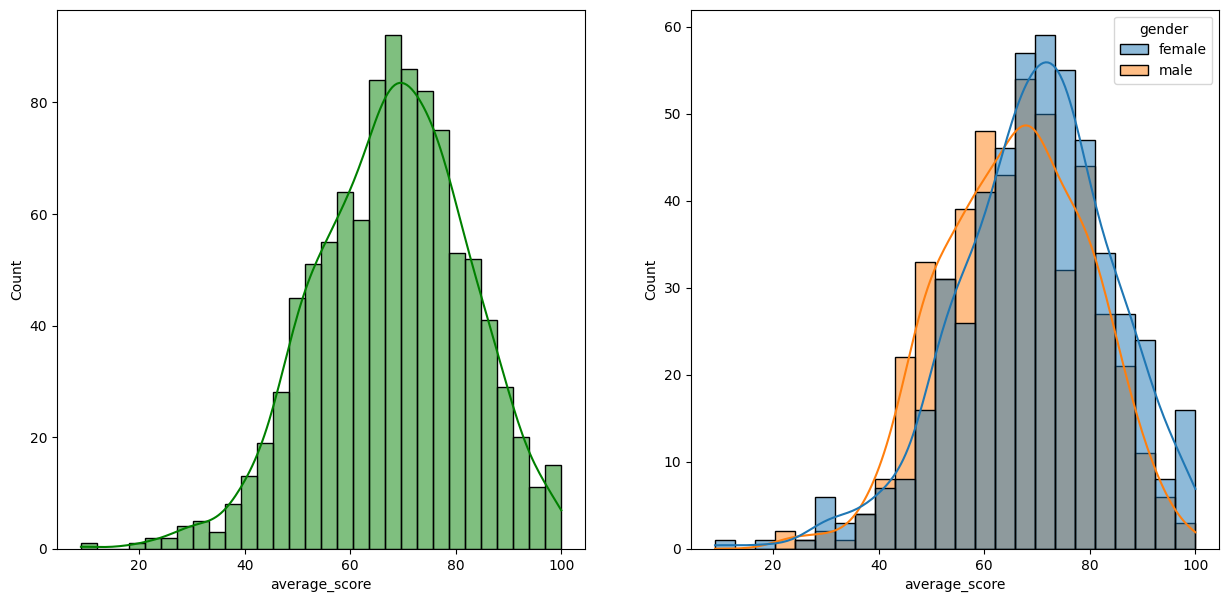

In [13]:
fig,axes = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average_score',kde=True,hue='gender')
plt.show()

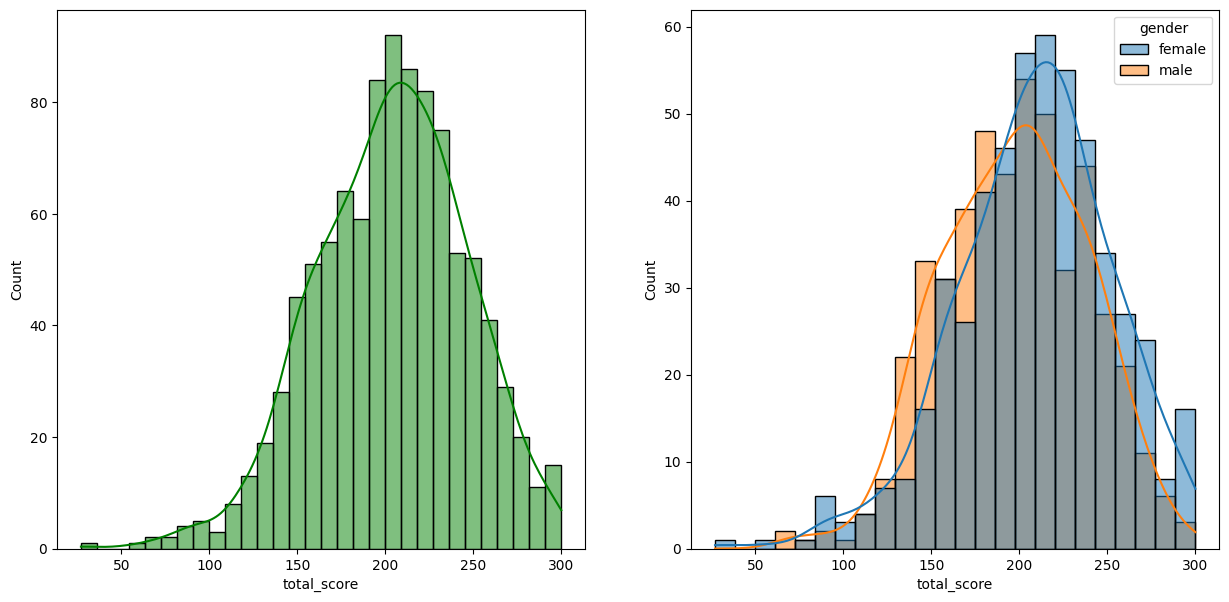

In [14]:
fig,axes = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total_score',kde=True,hue='gender')
plt.show()

<Axes: xlabel='average_score', ylabel='Count'>

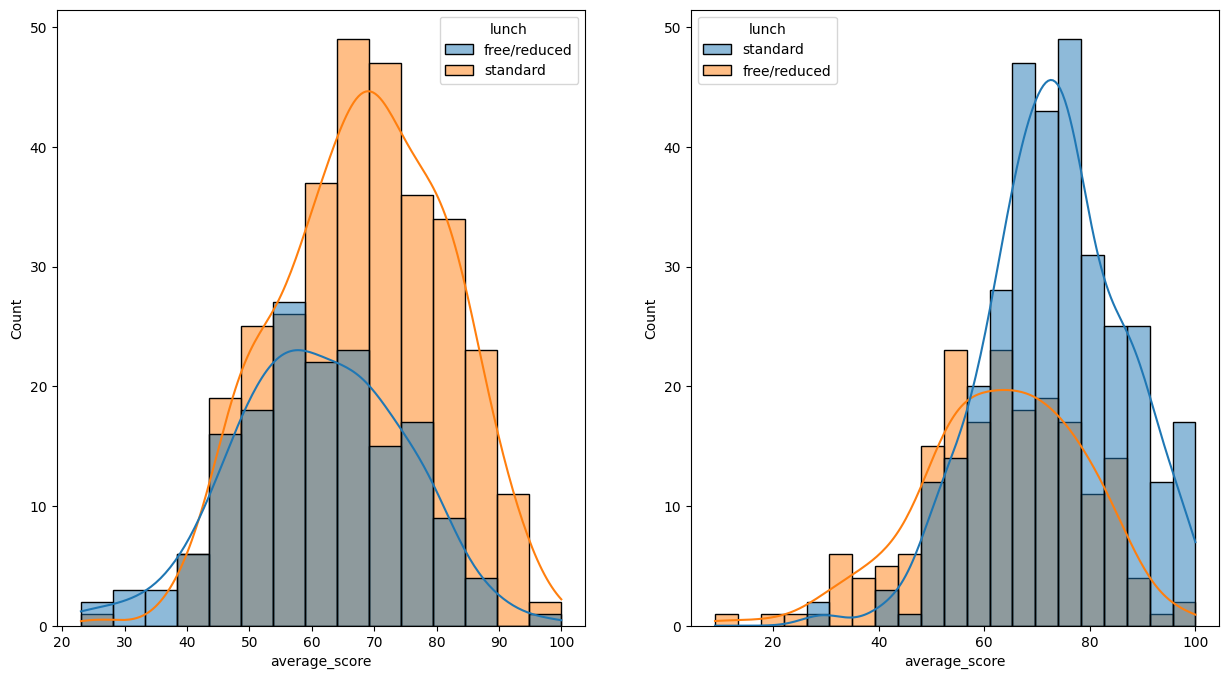

In [17]:
fig,axes = plt.subplots(1,2,figsize=(15,8))
plt.subplot(121)
sns.histplot(data=df[df['gender']=="male"],x='average_score',kde=True,hue='lunch')
plt.subplot(122)
sns.histplot(data=df[df['gender']=="female"],x='average_score',kde=True,hue='lunch')

In [24]:
!pip install scikit-learn


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
df['writng_reading_average'] = (df['reading_score']+df['writing_score'])/2

In [19]:
x = df.drop(columns=['math_score','average_score','total_score'],axis=1)
y = df['math_score']

In [20]:
cat_cols = x.select_dtypes(include='object').columns
num_cols = x.select_dtypes(exclude='object').columns
cat_cols = ['race_ethnicity', 'parental_level_of_education']
print(num_cols)
print(cat_cols)

Index(['reading_score', 'writing_score', 'writng_reading_average'], dtype='object')
['race_ethnicity', 'parental_level_of_education']


In [21]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race_ethnicity               1000 non-null   object 
 2   parental_level_of_education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test_preparation_course      1000 non-null   object 
 5   reading_score                1000 non-null   int64  
 6   writing_score                1000 non-null   int64  
 7   writng_reading_average       1000 non-null   float64
dtypes: float64(1), int64(2), object(5)
memory usage: 62.6+ KB


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [24]:
x_train.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score,writng_reading_average
29,female,group D,master's degree,standard,none,70,75,72.5
535,female,group C,bachelor's degree,free/reduced,completed,83,83,83.0
695,female,group D,some college,free/reduced,none,89,86,87.5
557,male,group C,master's degree,free/reduced,none,67,66,66.5
836,male,group E,high school,standard,none,64,57,60.5


In [25]:
print("shape of x_train",x_train.shape)
print("shape of y_train",y_train.shape)
print("shape of x_test",x_test.shape)
print("shape of y_test",y_test.shape)

shape of x_train (800, 8)
shape of y_train (800,)
shape of x_test (200, 8)
shape of y_test (200,)


In [26]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler,LabelEncoder,OrdinalEncoder
from sklearn.metrics import *
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.compose import ColumnTransformer


In [27]:
process = ColumnTransformer([('encode',OneHotEncoder(sparse_output=False,drop='first'),cat_cols),
                             ('scale',StandardScaler(),num_cols),
                             ('labeling',OrdinalEncoder(),['test_preparation_course','gender','lunch'])
                             ],verbose_feature_names_out=False).set_output(transform='pandas')

In [28]:
x_train=process.fit_transform(x_train)
x_test = process.transform(x_test)

In [29]:
x_train.head()

,race_ethnicity_group B,race_ethnicity_group C,race_ethnicity_group D,race_ethnicity_group E,parental_level_of_education_bachelor's degree,parental_level_of_education_high school,parental_level_of_education_master's degree,parental_level_of_education_some college,parental_level_of_education_some high school,reading_score,writing_score,writng_reading_average,test_preparation_course,gender,lunch
29,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.030791,0.434053,0.239334,1.0,0.0,1.0
535,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.930290,0.964701,0.958492,0.0,0.0,0.0
695,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.345443,1.163694,1.266702,1.0,0.0,0.0
557,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.176786,-0.162925,-0.171613,1.0,1.0,0.0
836,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,-0.384363,-0.759904,-0.582560,1.0,1.0,1.0


In [30]:
print("shape of x_train after transforming",x_train.shape)
print("shape of x_test after transforming",x_test.shape)

shape of x_train after transforming (800, 15)
shape of x_test after transforming (200, 15)


In [31]:
model = LinearRegression()
model.fit(x_train,y_train)
print("model learning score is",model.score(x_train,y_train))
print("model prediction score on test dataset",r2_score(y_test,model.predict(x_test)))


model learning score is 0.8743172040139593
model prediction score on test dataset 0.8804332983749564


In [32]:
from sklearn.ensemble import RandomForestRegressor


model = RandomForestRegressor(
    n_estimators=300,
    max_depth=12,
    random_state=42
)

model.fit(x_train, y_train)

print("Train R²:", model.score(x_train, y_train))
print("Test R²:", r2_score(y_test, model.predict(x_test)))


Train R²: 0.9749883969517925
Test R²: 0.8486082039780625


In [33]:
from sklearn.linear_model import SGDRegressor

In [36]:
smodel = SGDRegressor()
smodel.fit(x_train,y_train)
print(smodel.score(x_train,y_train))
r2_score(y_test,smodel.predict(x_test))

0.8718949579695745


0.8808234641253065